# Fess Upped

An analysis of our confessions using Python.

First create a virtual environment and install requirements as per the Readme file:

```bash
python3 -m venv venv

source venv/bin/activate

pip install --upgrade pip

pip install -r requirements.txt
```

## Setup Access to Twitter

If you don't have a Twitter account create one.

Register for developer access as per here - https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

Store the API Key, the API Key Secret and the Bearer token on three consecutive lines of a ```secrets.txt``` file, e.g.:
```
[Paste API KEY]
[Paste API Key Secret]
[Paste Bearer Token]
```

Then as per the guide, go into you Twitter "app" setup and generate an Access Key and Secret. Add these as lines 4 and 5 of the secrets.txt file:
```
[Paste API KEY]
[Paste API Key Secret]
[Paste Bearer Token]
[Paste Access Key]
[Paste Access Token]
```

In [8]:
with open("secrets.txt") as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

consumer_key = lines[0]
consumer_secret = lines[1]
bearer_token = lines[2]
access_token = lines[3]
access_token_secret = lines[4]

## Libraries and Code

We'll use the tweepy library to access Twitter and pandas to save the data.

In [9]:
# Import Libraries
import os
import tweepy as tw
import pandas as pd

In [10]:
# Setup programmatic API access
client = tw.Client(bearer_token)
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [15]:
# Lookup the Twitter ID for fesshole
client.get_users(usernames=["fesshole"])

Response(data=[<User id=1007749631818821638 name=Fesshole 🧻 username=fesshole>], includes={}, errors=[], meta={})

In [17]:
user_id = 1007749631818821638

In [18]:
tweets = client.get_users_tweets(id=user_id, tweet_fields=['context_annotations','created_at','geo'])

In [19]:
for tweet in tweets:
    print(tweet)

[<Tweet id=1548599650646728705 text='I saw half of an old episode of Thomas the Tank Engine recently, and someone snogged one of the engines. The idea that Percy the Green Engine has had more action than me over the past 12 months has probably sent me into a depressive spiral.'>, <Tweet id=1548584547834527744 text='I will instigate sex in the morning with my wife, knowing that she will rebuff my advances and instantly get up and make me coffee in bed'>, <Tweet id=1548569448721879040 text="I'm a 38 year old man and when I arrange the soft toys on my daughters bed while making it I'll position them in a way that they would be able to interact in case there is any consciousness in there.">, <Tweet id=1548433556682133504 text='I fell in love with a woman created by the AI account "This Person Does Not Exist" and it kills me that we can never be together.'>, <Tweet id=1548418456030105602 text="Refunding kindle books can cost authors so I never do it but I've been buying &amp; returning all 

In [20]:
tweets

Response(data=[<Tweet id=1548599650646728705 text='I saw half of an old episode of Thomas the Tank Engine recently, and someone snogged one of the engines. The idea that Percy the Green Engine has had more action than me over the past 12 months has probably sent me into a depressive spiral.'>, <Tweet id=1548584547834527744 text='I will instigate sex in the morning with my wife, knowing that she will rebuff my advances and instantly get up and make me coffee in bed'>, <Tweet id=1548569448721879040 text="I'm a 38 year old man and when I arrange the soft toys on my daughters bed while making it I'll position them in a way that they would be able to interact in case there is any consciousness in there.">, <Tweet id=1548433556682133504 text='I fell in love with a woman created by the AI account "This Person Does Not Exist" and it kills me that we can never be together.'>, <Tweet id=1548418456030105602 text="Refunding kindle books can cost authors so I never do it but I've been buying &amp; 

In [27]:
tweets.meta['next_token']

'7140dibdnow9c7btw4228myixwc23vdbddh42h184wo51'

### API Method

We need to use this method - https://docs.tweepy.org/en/stable/client.html#tweepy.Client.get_users_tweets

### Twitter Limitations on API

The "Reverse chronological home timeline" has limitations of "a per-user rate limit of 180 requests per 15-minute window and returns 800 of the most recent Tweets".

The endpoint can return the 3,200 most recent Tweets.

The user Tweet timeline endpoint is designed to support two common usage patterns: 

"Get a user’s historical Tweets": Requests made to user Tweet timeline in order to receive Tweets authored by the user of interest in chronological order over a specific recent timeframe. The timeframe can be set using the start_time and end_time and paginating through the full results.  In some cases, a user’s entire history of Tweets can be retrieved if the user has only authored up to 3,200 Tweets in their account. Tweets included will depend on the public availability and the authentication that is used for the requests.

"Polling for new Tweets": Requests made to user Tweet timeline on a continual basis, to retrieve new Tweets authored by a specific user. The last Tweet ID received can be set as a parameter for any new requests since the last Tweet.

We need to use pagenation to cycle through 32 requests to get the 3200 recent tweets.

We pass a ```pagination_token``` which is returned from the previous request.

In [28]:
tweets2 = client.get_users_tweets(id=user_id, max_results=10, pagination_token=tweets.meta['next_token'])

In [29]:
tweets2

Response(data=[<Tweet id=1548342958591619074 text='I babysat for an awful family with two kids. The kids had a pet rabbit they abused horribly. One day I volunteered to take him to the vet, told the vet to write on his card that he was euthanized and dead.. I took the bunny home. He turns 8 this summer.'>, <Tweet id=1548327859571175424 text="My wife loves Bees. We found a dying one and gave it sugary water. Woke up the next day and it was gone. She was so happy. I don't have the heart to tell her it drowned so I chucked it next door.">, <Tweet id=1548312759518892036 text="I suffered a severe double Inguinal Hernia 20 years ago lifting a heavy bag of compost. My employer kindly paid for the very painful operation as an emergency following doctor's advice. I lied. My wife &amp; I had spent an entire Easter weekend shagging, off our faces on ecstasy.">, <Tweet id=1548297658632007685 text="When I was a kid, my parents were trying to think of a creative punishment and asked if taking the ba

In [31]:
import time

responses = list()
pagination_token = None
# Iterate over 32 pages of 100 tweets
for i in range(0, 32):
    if not pagination_token:
        response = client.get_users_tweets(id=user_id, max_results=100)
    else:
        response = client.get_users_tweets(id=user_id, max_results=100, pagination_token=pagination_token)
    pagination_token = response.meta['next_token']
    responses.append(response) 
    # Throttle a little to be kind
    time.sleep(0.5)

In [32]:
len(responses)

32

In [34]:
responses[0].data[0], responses[1].data[0]

(<Tweet id=1548614747280576513 text='I forgot to scan a bottle of wine at Tesco Express and realised when I got home. Walked back and told them so I could pay for it. I am an utter loser.'>,
 <Tweet id=1546440421299163138 text='My southern husband is very sniffy about "northern" water and insists on buying posh bottled water from Waitrose. Little does he know this is what gets poured into the dogs water bowl and his bottle gets filled up with dirty northern muck.'>)

There seem to be about 16 tweets per day. So 3200 is about 200 days worth. So you would fetch twice a year to update.

In [36]:
import pickle

def SaveLists(data, filename):
    open_file = open(filename, "wb")
    pickle.dump(data, open_file)
    open_file.close()

def LoadLists(file):
    open_file = open(file, "rb")
    loaded_list = pickle.load(open_file)
    open_file.close()
    return loaded_list

SaveLists(responses, "2022-07-17 - Saved Data")

In [38]:
# This tweet has recap photo data
tweet_id = 1543983465368018947

In [40]:
r = client.get_tweet(id=tweet_id); r 

Response(data=<Tweet id=1543983465368018947 text='Best public confessions for April 2022, what a great month that was. Do keep sending stories in and keeping us laughing. Thank you everyone, and remember to encourage your friends to FOLLOW @FESSHOLE NOW, so we can keep it all going with your most extraordinary confessions. https://t.co/iEQaPLFz5N'>, includes={}, errors=[], meta={})

In [44]:
"https://" in r.data.text, "@" in r.data.text

(True, True)

### Post Processing

We need to exclude any tweets that have a link, twitter handle or attached media.
* Link we can just look for "http://" in tweet. This also filters out "recap" posts with media as these have an https link as above.
* Look for @ in tweet.

In [46]:
# Process Tweets
cleaned_data = list()
for response in responses:
    for tweet in response.data:
        if not "https://" in tweet.text and not "@" in tweet.text:
            cleaned_data.append(tweet.text)

In [48]:
cleaned_data[0:10]

['I forgot to scan a bottle of wine at Tesco Express and realised when I got home. Walked back and told them so I could pay for it. I am an utter loser.',
 'I saw half of an old episode of Thomas the Tank Engine recently, and someone snogged one of the engines. The idea that Percy the Green Engine has had more action than me over the past 12 months has probably sent me into a depressive spiral.',
 'I will instigate sex in the morning with my wife, knowing that she will rebuff my advances and instantly get up and make me coffee in bed',
 "I'm a 38 year old man and when I arrange the soft toys on my daughters bed while making it I'll position them in a way that they would be able to interact in case there is any consciousness in there.",
 'I fell in love with a woman created by the AI account "This Person Does Not Exist" and it kills me that we can never be together.',
 "Refunding kindle books can cost authors so I never do it but I've been buying &amp; returning all Tory MPs books I can

In [49]:
# Setup spacy by downloading the small web model, which should be good for tweets
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.9 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [50]:
# Process Text with Spacy
import spacy

nlp = spacy.load("en_core_web_sm")
docs = list(nlp.pipe(cleaned_data))

### LDA

Gensim provides library functions to perform LDA. 

We can replace some of the functions used in the tutorial with outputs from spacy. For example, we can use the lemma_ attribute of tokens and then take the lower of this.

In [51]:
# Lemmatise the docs and take the lowercase representation
lower_lemmas = [[t.lemma_.lower() for t in doc] for doc in docs]

In [52]:
lower_lemmas[10]

['i',
 'babysat',
 'for',
 'an',
 'awful',
 'family',
 'with',
 'two',
 'kid',
 '.',
 'the',
 'kid',
 'have',
 'a',
 'pet',
 'rabbit',
 'they',
 'abuse',
 'horribly',
 '.',
 'one',
 'day',
 'i',
 'volunteer',
 'to',
 'take',
 'he',
 'to',
 'the',
 'vet',
 ',',
 'tell',
 'the',
 'vet',
 'to',
 'write',
 'on',
 'his',
 'card',
 'that',
 'he',
 'be',
 'euthanize',
 'and',
 'dead',
 '..',
 'i',
 'take',
 'the',
 'bunny',
 'home',
 '.',
 'he',
 'turn',
 '8',
 'this',
 'summer',
 '.']

In [55]:
# Spacy has an inbuilt stoplist that is available as a token attribute
for t in docs[10][0:20]:
    print(t, t.is_stop)

I True
babysat False
for True
an True
awful False
family False
with True
two True
kids False
. False
The True
kids False
had True
a True
pet False
rabbit False
they True
abused False
horribly False
. False


In [56]:
# Let's also (as per old NLP) remove numbers, punctuation and single letter words.
processed_text = [[t.lemma_.lower() for t in doc if not (t.is_stop or t.is_punct or t.is_digit)] for doc in docs]

In [57]:
processed_text[10]

['babysat',
 'awful',
 'family',
 'kid',
 'kid',
 'pet',
 'rabbit',
 'abuse',
 'horribly',
 'day',
 'volunteer',
 'vet',
 'tell',
 'vet',
 'write',
 'card',
 'euthanize',
 'dead',
 'take',
 'bunny',
 'home',
 'turn',
 'summer']

In [67]:
# Configure Logging for Gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Add n_grams to the doc tokens
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(processed_text, min_count=20)
for idx in range(len(processed_text)):
    for token in bigram[processed_text[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            processed_text[idx].append(token)

2022-07-17 12:22:29,223 : INFO : collecting all words and their counts
2022-07-17 12:22:29,224 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-07-17 12:22:29,268 : INFO : collected 50947 token types (unigram + bigrams) from a corpus of 51200 words and 2935 sentences
2022-07-17 12:22:29,269 : INFO : merged Phrases<50947 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>
2022-07-17 12:22:29,269 : INFO : Phrases lifecycle event {'msg': 'built Phrases<50947 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000> in 0.05s', 'datetime': '2022-07-17T12:22:29.269866', 'gensim': '4.2.0', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-5.15.0-41-generic-x86_64-with-glibc2.10', 'event': 'created'}


In [69]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(processed_text)

2022-07-17 12:23:21,838 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-07-17 12:23:21,895 : INFO : built Dictionary<7880 unique tokens: ['bottle', 'express', 'forgot', 'get', 'home']...> from 2935 documents (total 51698 corpus positions)
2022-07-17 12:23:21,895 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<7880 unique tokens: ['bottle', 'express', 'forgot', 'get', 'home']...> from 2935 documents (total 51698 corpus positions)", 'datetime': '2022-07-17T12:23:21.895933', 'gensim': '4.2.0', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-5.15.0-41-generic-x86_64-with-glibc2.10', 'event': 'created'}


I omitted the token filtering as this reduced the dictionary to only 470 tokens. We can maybe try this as a variation.
```
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)
print('Number of unique tokens: %d' % len(dictionary))
```

In [70]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in processed_text]

In [71]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
# Changed this to 4000 to cover all the docs as they are short and fit in memory
chunksize = 4000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2022-07-17 12:24:36,631 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2022-07-17 12:24:36,633 : INFO : using serial LDA version on this node
2022-07-17 12:24:36,638 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 2935 documents, updating model once every 2935 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-07-17 12:24:36,639 : INFO : PROGRESS: pass 0, at document #2935/2935
2022-07-17 12:24:37,934 : INFO : optimized alpha [0.07004665, 0.07151671, 0.07835673, 0.07398079, 0.080541484, 0.07157614, 0.07575834, 0.07633582, 0.083537795, 0.07283665]
2022-07-17 12:24:37,938 : INFO : topic #0 (0.070): 0.009*"go" + 0.009*"like" + 0.007*"time" + 0.006*"try" + 0.006*"year" + 0.006*"year_old" + 0.006*"day" + 0.005*"wife" + 0.005*"buy" + 0.005*"tell"
2022-07-17 12:24:37,939 : INFO : topic #1 (0.072): 0.009*"year" + 0.008*"day" + 0.007

In [72]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2022-07-17 12:25:26,453 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-07-17 12:25:26,457 : INFO : CorpusAccumulator accumulated stats from 2000 documents


Average topic coherence: -2.9604.
[([(0.027623765, 'year_old'),
   (0.013424676, 'year'),
   (0.012604725, 'old'),
   (0.012436859, 'think'),
   (0.009284224, 'wife'),
   (0.008263561, 'work'),
   (0.0068875323, 'get'),
   (0.006652288, 'take'),
   (0.006451795, 'time'),
   (0.0061963326, 'look'),
   (0.00617845, 'tell'),
   (0.006124915, 'kid'),
   (0.005946673, 'want'),
   (0.0057988726, 'day'),
   (0.0056434027, 'night'),
   (0.005336212, 'go'),
   (0.005288253, 'like'),
   (0.005078944, 'know'),
   (0.004822383, 'home'),
   (0.004517141, 'watch')],
  -2.508778851428638),
 ([(0.009646516, 'work'),
   (0.007426429, 'year'),
   (0.0073261233, 'get'),
   (0.0063504386, 'day'),
   (0.0063478895, 'ask'),
   (0.005703999, 'go'),
   (0.0053586126, 'think'),
   (0.005344327, 'wife'),
   (0.005307524, 'leave'),
   (0.005194282, 'phone'),
   (0.005062379, 'see'),
   (0.004631838, 'house'),
   (0.0041664885, 'month'),
   (0.0039775185, 'watch'),
   (0.0038153583, 'tell'),
   (0.00360465, 'turn

These don't seem that informative. Maybe we can try a smaller number of terms and categories - ~3-5 might be better?

In [73]:
# Set training parameters.
num_topics = 5
# Changed this to 4000 to cover all the docs as they are short and fit in memory
chunksize = 4000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model_5_topics = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2022-07-17 13:21:12,767 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2022-07-17 13:21:12,769 : INFO : using serial LDA version on this node
2022-07-17 13:21:12,773 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 2935 documents, updating model once every 2935 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-07-17 13:21:12,773 : INFO : PROGRESS: pass 0, at document #2935/2935
2022-07-17 13:21:14,488 : INFO : optimized alpha [0.12796906, 0.08961503, 0.091474965, 0.11935673, 0.10663368]
2022-07-17 13:21:14,491 : INFO : topic #0 (0.128): 0.008*"work" + 0.008*"tell" + 0.008*"year" + 0.007*"go" + 0.007*"know" + 0.007*"day" + 0.007*"time" + 0.007*"think" + 0.007*"wife" + 0.006*"get"
2022-07-17 13:21:14,492 : INFO : topic #1 (0.090): 0.009*"wife" + 0.007*"like" + 0.007*"work" + 0.007*"year" + 0.006*"think" + 0.005*"go" + 0.005*"car" + 0.004*"start" + 0.00

In [75]:
top_topics = model_5_topics.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2022-07-17 13:22:22,879 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-07-17 13:22:22,885 : INFO : CorpusAccumulator accumulated stats from 2000 documents


Average topic coherence: -2.9864.
[([(0.008401592, 'tell'),
   (0.008329867, 'year'),
   (0.008311955, 'work'),
   (0.007281114, 'think'),
   (0.007266619, 'go'),
   (0.0070023243, 'time'),
   (0.0069170464, 'know'),
   (0.00687769, 'day'),
   (0.00666528, 'wife'),
   (0.006061705, 'home'),
   (0.005939274, 'get'),
   (0.005651907, 'like'),
   (0.005285475, 'year_old'),
   (0.005133517, 'find'),
   (0.005015271, 'amp'),
   (0.005005254, 'house'),
   (0.004826099, 'take'),
   (0.0044314233, 'night'),
   (0.0042268774, 'try'),
   (0.0040393216, 'phone')],
  -2.728030812758343),
 ([(0.008930059, 'wife'),
   (0.007814125, 'like'),
   (0.0072308853, 'work'),
   (0.006624984, 'think'),
   (0.0060265507, 'year'),
   (0.00536799, 'go'),
   (0.005007619, 'car'),
   (0.0043887445, 'use'),
   (0.004222545, 'time'),
   (0.004213434, 'start'),
   (0.0041473834, 'send'),
   (0.0036247184, 'ask'),
   (0.003500393, 'know'),
   (0.003343804, 'tell'),
   (0.0030987775, 'get'),
   (0.0030883746, 'good'),

## Clustering with Spacy & Scikit Learn

Now we can try some clustering approaches instead.

In [98]:
# Tweaked this to also remove numbers

def spacy_tokenizer(doc):
    spacy_doc = nlp(doc)
    tokens = [token.lemma_.lower() for token in spacy_doc if (
        token.is_alpha == True and \
        token.like_num == False and \
        token.is_stop == False and \
        token.is_punct == False and \
        token.lemma_.strip()!= '')]
    return tokens

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
# Create a vectoriser for the tweet docs
tfidf_vectorizer = TfidfVectorizer(input = 'content', tokenizer = spacy_tokenizer)

In [101]:
result = tfidf_vectorizer.fit_transform(cleaned_data)

In [102]:
result

<2935x7518 sparse matrix of type '<class 'numpy.float64'>'
	with 46967 stored elements in Compressed Sparse Row format>

In [103]:
features = tfidf_vectorizer.get_feature_names_out(); features[0:500]

array(['aback', 'abandon', 'abdul', 'aberystwyth', 'abject', 'able',
       'abnormally', 'abomination', 'abortion', 'abroad', 'absence',
       'absent', 'absentmindedly', 'absolute', 'absolutely', 'abuse',
       'abusive', 'ac', 'academic', 'acc', 'accent', 'accept',
       'acceptable', 'acceptance', 'access', 'accessible', 'accident',
       'accidentally', 'accidently', 'accompanying', 'accomplice',
       'accomplishment', 'accord', 'account', 'accountancy', 'accountant',
       'accounting', 'accuse', 'ache', 'acheive', 'achieve',
       'achievement', 'acknowledge', 'acoustic', 'acquaintance',
       'acquire', 'acrimonious', 'acrostic', 'act', 'acting', 'action',
       'activate', 'actively', 'activity', 'actor', 'actress', 'actual',
       'actually', 'ad', 'add', 'addicted', 'addiction', 'addition',
       'additional', 'address', 'addressee', 'adhesive', 'adjacent',
       'adjective', 'adjourn', 'adjust', 'admin', 'administer',
       'administration', 'admire', 'admirin

In [104]:
dense = result.todense()
denselist = dense.tolist()
df = pd.DataFrame(
    denselist,columns=tfidf_vectorizer.get_feature_names_out())

In [106]:
df

,aback,abandon,abdul,aberystwyth,abject,able,abnormally,abomination,abortion,abroad,...,zebra,zelda,zesty,ziplock,zit,zombie,zone,zoo,zoom,zx
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.268138,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2931,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2932,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2933,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
# Changed this to 4000 to cover all the docs as they are short and fit in memory
chunksize = 4000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2022-07-17 12:24:36,631 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2022-07-17 12:24:36,633 : INFO : using serial LDA version on this node
2022-07-17 12:24:36,638 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 2935 documents, updating model once every 2935 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-07-17 12:24:36,639 : INFO : PROGRESS: pass 0, at document #2935/2935
2022-07-17 12:24:37,934 : INFO : optimized alpha [0.07004665, 0.07151671, 0.07835673, 0.07398079, 0.080541484, 0.07157614, 0.07575834, 0.07633582, 0.083537795, 0.07283665]
2022-07-17 12:24:37,938 : INFO : topic #0 (0.070): 0.009*"go" + 0.009*"like" + 0.007*"time" + 0.006*"try" + 0.006*"year" + 0.006*"year_old" + 0.006*"day" + 0.005*"wife" + 0.005*"buy" + 0.005*"tell"
2022-07-17 12:24:37,939 : INFO : topic #1 (0.072): 0.009*"year" + 0.008*"day" + 0.007

So we've got 2935 tweets and 7518 word tokens.

Now let's try splitting into 5 clusters.

In [107]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(result)

In [109]:
# The labels provides a label of 0 and 1 to each tweet representing the cluster
kmeans.labels_[0:100]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [111]:
for i, tweet in enumerate(cleaned_data[0:100]):
    print(f"#{i} Group: {kmeans.labels_[i]} - {tweet}") 

#0 Group: 0 - I forgot to scan a bottle of wine at Tesco Express and realised when I got home. Walked back and told them so I could pay for it. I am an utter loser.
#1 Group: 0 - I saw half of an old episode of Thomas the Tank Engine recently, and someone snogged one of the engines. The idea that Percy the Green Engine has had more action than me over the past 12 months has probably sent me into a depressive spiral.
#2 Group: 0 - I will instigate sex in the morning with my wife, knowing that she will rebuff my advances and instantly get up and make me coffee in bed
#3 Group: 1 - I'm a 38 year old man and when I arrange the soft toys on my daughters bed while making it I'll position them in a way that they would be able to interact in case there is any consciousness in there.
#4 Group: 0 - I fell in love with a woman created by the AI account "This Person Does Not Exist" and it kills me that we can never be together.
#5 Group: 0 - Refunding kindle books can cost authors so I never do it

In [113]:
print("Top terms per cluster:")

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names_out()
for i in range(2):
    print("Cluster %d:" % i, end="")
    for ind in order_centroids[i, :10]:
        print(" %s" % terms[ind], end="")
    print()

Top terms per cluster:
Cluster 0: work like think day wife go time tell get know
Cluster 1: year ago old get tell go work think wife know


The two binary clusters are actually similar to the LDA terms...

Let's have a look at 5 clusters...

In [116]:
k = 5
kmeans5 = KMeans(n_clusters=k).fit(result)
print("Top terms per cluster:")

order_centroids = kmeans5.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i, end="")
    for ind in order_centroids[i, :10]:
        print(" %s" % terms[ind], end="")
    print()

Top terms per cluster:
Cluster 0: like look feel wife think year go amp time know
Cluster 1: car park drive home amp key buy walk think window
Cluster 2: work day home tell leave go get wife office time
Cluster 3: year ago old tell get month pay card birthday go
Cluster 4: think wife go time get tell know find kid night


We haven't got any fixed labels so we can't do any metric comparisons.

We could try dimensionality reduction on the sparse matrix (e.g. using SVD/PCA) as per the scikit learn tutorial).

In [123]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

n_components = 2048

print("Performing dimensionality reduction using LSA")
t0 = time.time()
# Since LSA/SVD results are not normalized,
# we redo the normalization to improve the k-means result.
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(result)

print("done in %fs" % (time.time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print(
        "Explained variance of the SVD step: {}%".format(int(explained_variance * 100))
)

print()

Performing dimensionality reduction using LSA
done in 10.377955s
Explained variance of the SVD step: 94%



With dimensionality of 256:
    ```Explained variance of the SVD step: 35%```
   
With dimensionality of 512:
    ```Explained variance of the SVD step: 53%```
    
With dimensionality of 1024:
    ```Explained variance of the SVD step: 74%```
    
With dimensionality of 2048:
    ```Explained variance of the SVD step: 94%```

Resources:
* Twitter API Guide - https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9
* Getting an twitter ID from the username - https://commentpicker.com/twitter-id.php
* Gensim LDA Tutorial - https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html
* Multicore LDA - https://radimrehurek.com/gensim/models/ldamulticore.html#module-gensim.models.ldamulticore
* Clustering using Spacy and k-means - https://towardsdatascience.com/lovecraft-with-natural-language-processing-part-3-tf-idf-vectors-8c2d4df98621
* Text Clustering - https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html

## Vector Approaches

Does Spacy's small model have the document and token vectors? 

In [130]:
docs[0].vector

array([ 0.18594387,  0.16888966,  0.28720382, -0.38914073, -0.21498613,
        0.0081727 ,  0.27990252, -0.13706498,  0.18426497,  0.17324325,
        0.09657438, -0.36668128, -0.25833127,  0.13369688, -0.07087755,
       -0.02753761,  0.3461509 ,  0.15571254,  0.29998636, -0.24718584,
       -0.10208539, -0.11834659, -0.15631823,  0.15458196, -0.00062301,
        0.22753753,  0.25856328, -0.21417281, -0.21280351,  0.2066378 ,
       -0.137276  ,  0.39799392, -0.19289292,  0.04366756, -0.16721827,
        0.14674605,  0.06208356, -0.2569759 , -0.09906635,  0.2476246 ,
        0.3009634 ,  0.33929887,  0.18252881, -0.3497901 , -0.11971787,
        0.24228641,  0.06505639,  0.34647694, -0.16878408,  0.13640754,
        0.10007541, -0.5262517 ,  0.2547306 ,  0.29229394, -0.19566934,
        0.06341206,  0.23912658,  0.33801916, -0.33561698,  0.07155561,
       -0.27544618,  0.1861917 , -0.23011814, -0.37493348, -0.17503904,
       -0.35982522, -0.07995447, -0.01677367, -0.10707267, -0.04

In [131]:
docs[0][0].vector

array([-3.6765409e-01, -5.7722318e-01,  2.1194920e-01, -1.2547704e+00,
       -1.4639720e-01, -1.0181818e+00, -2.5964144e-01,  8.4472358e-01,
        1.0670036e+00, -1.2572292e+00,  4.8258346e-01, -2.4305277e-01,
       -9.2291451e-01, -4.7000229e-01, -1.0484686e+00, -1.4504822e+00,
       -3.0042210e-01,  6.6941988e-01,  2.3547079e-01, -8.6931884e-04,
       -3.5365933e-01, -8.2129788e-01,  1.2119005e+00, -1.0266219e+00,
        2.3740704e+00,  9.3580234e-01, -3.5084561e-02, -1.4832381e+00,
       -2.8808919e-01,  1.3152186e+00, -2.4065751e-01, -5.8939821e-01,
        6.0756266e-02,  6.4895257e-02, -1.3798523e-01, -3.6651823e-01,
       -1.5674536e-01,  2.8770363e-01, -7.5796318e-01, -4.6383306e-01,
        7.9316884e-02,  1.3314869e+00,  2.0101924e+00, -4.2304909e-01,
       -2.4173671e-01, -5.5828965e-01,  1.8740424e+00,  5.1597446e-02,
       -1.0434469e+00, -1.6145861e-01, -2.5521708e-01, -1.5776722e+00,
        1.0559149e+00, -1.4191464e+00, -1.1082259e+00,  1.8252122e+00,
      

Yes - they do.

In [133]:
len(docs[0].vector), len(docs[0][0].vector)

(96, 96)

In [138]:
docs[0].tensor, docs[0].tensor.shape, len(docs[0])

(array([[-3.6765409e-01, -5.7722318e-01,  2.1194920e-01, ...,
          3.1927299e-01, -9.8574227e-01, -2.3198751e-01],
        [ 1.4588490e-02,  1.4622711e+00, -3.9620340e-01, ...,
         -3.4418225e-02, -3.0247152e-02, -3.5827222e-01],
        [ 2.4611797e+00, -1.1400725e-01,  3.0050297e+00, ...,
          1.6369969e-03, -5.9913552e-01, -5.9717619e-01],
        ...,
        [-5.9824848e-01, -6.7280948e-02, -7.6557112e-01, ...,
          3.6814749e-02,  1.0736504e+00, -9.9289143e-01],
        [-9.2127538e-01,  2.9165787e-01,  7.7765393e-01, ...,
         -1.0747951e-01, -1.4419162e-01,  1.6308469e-01],
        [-1.8552158e+00, -5.3190029e-01,  4.0953863e-01, ...,
         -9.8345023e-01,  8.3542401e-01,  1.5334572e+00]], dtype=float32),
 (36, 96),
 36)

So we do have a 96-length document vector and a tensor of size num_tokens * 96, where each token has a 96-element vector as well.

We can create a matrix for the set of documents by concatening the doc vectors, then use this to find similarity via a vector cross product.

In [139]:
import numpy as np

In [145]:
docs_matrix = np.column_stack([d.vector for d in docs]).T

In [146]:
docs_matrix.shape

(2935, 96)

In [147]:
# Check this is the vector we extracted above for the first doc
docs_matrix[0]

array([ 0.18594387,  0.16888966,  0.28720382, -0.38914073, -0.21498613,
        0.0081727 ,  0.27990252, -0.13706498,  0.18426497,  0.17324325,
        0.09657438, -0.36668128, -0.25833127,  0.13369688, -0.07087755,
       -0.02753761,  0.3461509 ,  0.15571254,  0.29998636, -0.24718584,
       -0.10208539, -0.11834659, -0.15631823,  0.15458196, -0.00062301,
        0.22753753,  0.25856328, -0.21417281, -0.21280351,  0.2066378 ,
       -0.137276  ,  0.39799392, -0.19289292,  0.04366756, -0.16721827,
        0.14674605,  0.06208356, -0.2569759 , -0.09906635,  0.2476246 ,
        0.3009634 ,  0.33929887,  0.18252881, -0.3497901 , -0.11971787,
        0.24228641,  0.06505639,  0.34647694, -0.16878408,  0.13640754,
        0.10007541, -0.5262517 ,  0.2547306 ,  0.29229394, -0.19566934,
        0.06341206,  0.23912658,  0.33801916, -0.33561698,  0.07155561,
       -0.27544618,  0.1861917 , -0.23011814, -0.37493348, -0.17503904,
       -0.35982522, -0.07995447, -0.01677367, -0.10707267, -0.04

Yep - so this is a naive corpus matrix.

In [149]:
sim_matrix = np.matmul(docs_matrix, docs_matrix.T)

In [150]:
sim_matrix.shape

(2935, 2935)

In [153]:
sim_matrix[0], sim_matrix[0].max()

(array([4.9261904, 2.3974876, 2.7224295, ..., 2.6190352, 3.0411859,
        2.6690173], dtype=float32),
 4.9261904)

We want to normalise by the diagonal terms.

In [155]:
diag = sim_matrix.diagonal(); diag

array([4.9261904, 4.4708366, 5.3287897, ..., 4.329993 , 4.0006404,
       5.0607276], dtype=float32)

In [156]:
normalised_mat = sim_matrix / diag

In [157]:
normalised_mat

array([[1.        , 0.53625035, 0.5108908 , ..., 0.60485905, 0.76017475,
        0.52739793],
       [0.48668188, 1.        , 0.3537342 , ..., 0.71608055, 0.5924681 ,
        0.6576198 ],
       [0.552644  , 0.42161575, 1.        , ..., 0.64410156, 0.6576288 ,
        0.60892177],
       ...,
       [0.5316553 , 0.69352204, 0.5233749 , ..., 1.        , 0.5984148 ,
        0.6563316 ],
       [0.61735046, 0.5301584 , 0.49372116, ..., 0.5528975 , 1.        ,
        0.48289704],
       [0.5418015 , 0.7443874 , 0.5782902 , ..., 0.76709497, 0.6108548 ,
        1.        ]], dtype=float32)

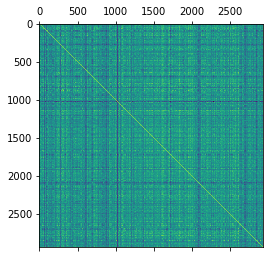

In [167]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.matshow(normalised_mat)